## <center>Elements Of Data Science - S2021</center>
# <center>Week 4: Hypothesis Testing<center>
### <center>1/8/2021</center>

# TODOs

- Readings
 - PDSH Chap 5 up to but not including Hyperparameters and Model Evaluation
 - PDSH Chap 5 In Depth: Linear Regression
 - PDSH Chap 5 In Depth: Support Vector Machines
 - PDSH Chap 5 In Depth: Decision Trees and Random Forests
 - Recommended PML Chap 3
 - Optional PML Chap 2
<br>
<br>

- Quiz 4, due Sunday Feb 14th, 11:59pm ET via Gradescope

- HW1, due Sunday Feb 14th, 11:59pm ET via Gradescope

# Additional Resources for Hypothesis Testing


- Statistical Rules of Thumb, Gerald van Belle [Chapter 2 online](http://www.vanbelle.org/chapters/webchapter2.pdf)


- [“The 2019 ASA Guide to P-values and Statistical Significance: Don’t Say What You Don’t Mean” (Some Recommendations)(ii)](https://errorstatistics.com/2019/06/17/the-2019-asa-guide-to-p-values-and-statistical-significance-dont-say-what-you-dont-mean-some-recommendations/)


# Today

- Confidence Intervals
- Hypothesis Testing
- MAB

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# Hypothesis Testing

- Random Sampling
- Confidence Intervals
- A/B Tests
- Hypothesis Testing
- Permutation Tests
- p-values
- Multi-Armed Bandit

# Questions and More Questions
<br>

- Have web conversions gone up?

- Have stock prices changed?

- Which ad generates more sales?

- Which headline generates more clicks?

- Did the number of "likes" change?

# Mini Probability Review
<br>

- **Random Variable**
 - takes values from an associated probability distribution

- **Distribution**
 - describes probability of values of a Random Variable

- **$P(x)$: Probability**
 - probability of seeing $x$, takes value in [0,1]
 - Ex: Probability of getting heads on a coin toss

- **$P(x\mid y)$: Conditional Probability**
 - probability of seeing $x$, given that some $y$ is true
 - Ex: Probability of getting heads on a coin toss given that coin is fair
 
so much more! [See Data Science From Scratch](https://ezproxy.cul.columbia.edu/login?qurl=https%3A%2F%2Fsearch.ebscohost.com%2Flogin.aspx%3Fdirect%3Dtrue%26db%3Dnlebk%26AN%3D979529%26site%3Dehost-live%26scope%3Dsite&ebv=EK&ppid=Page-__-54)

# Population Distributions and Sampling
<br>

- **"The World" or "Ground Truth"**
 - Ex: The length of taxi rides

- **"A Sample" or "Our Data"**
 - Ex: The length of taxi rides we saw in Jan 2017

# Population Dists. and Sampling
<br>

- **Population Distribution:** The actual distribution out in world
 - Ex: Actual distribution of taxi trip length


- **Random Sample:** Our observations of the true population distrution
 - We hope this does not differ systematically from the true distribution
 - Ex: The taxi trip lengths recorded in Jan 2017


- **Sample Size (n):** The number of observations, the larger the better
 - Ex: We saw 1,000 trips

# Population Dists and Sampling
<br>


- **Population Mean vs. Sample Mean:** $\mu$ vs. $\bar{x}$
 - Ex: The true mean trip length vs the one we observed


- **Population Std. Dev. vs Sample Std. Dev.:** $\sigma$ vs. $s$
 - Ex: The true spread of trip length vs the one we observed
 
 
- **Sample Statistic:** eg. mean, median, standard deviation
 - Ex: We're interested in mean trip length


- **Sampling Distribution:** Distribution of the sample statistic
 - Ex: How is mean trip length distributed if we were to repeat our experiment many times? 

# Things To Know First
<br>


- sample size
<br>

- shape (skewed?, multimodal?)
<br>

- location (central tendencies)
<br>

- spread
<br>

# Example: What can we say about the length of an average taxi trip in Jan 2017?

In [2]:
df = pd.read_csv('../data/yellowcab_demo.csv',
                 header=1,
                 parse_dates=['pickup_datetime','dropoff_datetime'])
print(df.shape)

df.head(3)

(1000, 6)


,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,payment_type
0,2017-01-05 14:49:04,2017-01-05 14:53:53,0.89,5.5,1.26,Credit card
1,2017-01-15 01:07:22,2017-01-15 01:26:47,2.70,14.0,0.00,Cash
2,2017-01-29 09:55:00,2017-01-29 10:04:43,1.41,8.0,0.00,Cash


# Sampling From the Population

In [3]:
sample = df.trip_distance.sample(n=50,             # our sample size
                                 random_state=123, # needed for reproducability
                                 replace=False     # sample without replacement    
                                )
sample.describe()

count    50.000000
mean      2.141800
std       2.563404
min       0.300000
25%       0.910000
50%       1.600000
75%       2.187500
max      17.300000
Name: trip_distance, dtype: float64

# Plot the distribution of our Sample

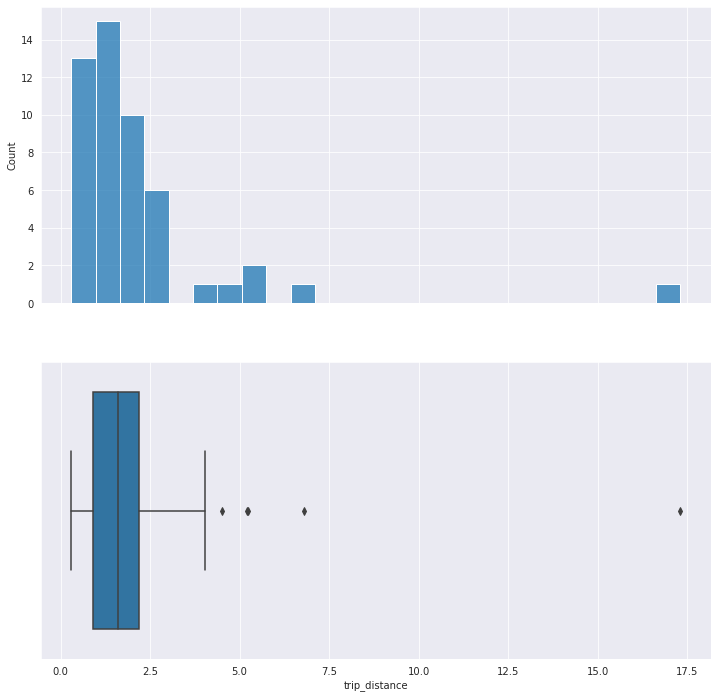

In [4]:
fig,ax = plt.subplots(2,1,figsize=(12,12),sharex=True)
sns.histplot(x=sample, ax=ax[0]);
sns.boxplot(x=sample, ax=ax[1]);

# Define the Sample Statistic

In [5]:
xbar = sample.mean()
print(f'sample mean: {xbar:0.2f}')

sample mean: 2.14


- Is this sample statistic a good approximation?

- Let's take more samples!

# Generating Samples

In [6]:
sample_means = []
for i in range(1000):
    sample_mean = df.trip_distance.sample(n=50,random_state=i).mean()
    sample_means.append(sample_mean)

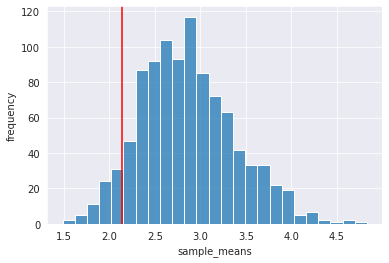

In [7]:
# sampling distribution with original statistic
ax = sns.histplot(x=sample_means)
ax.set_xlabel('sample_means');
ax.set_ylabel('frequency');
ax.axvline(xbar,color='red');

# Central Limit Theorem

If all samples are randomly drawn from the same sample population:

For reasonably large samples (usually $n \ge 30$), the distribution of sample mean $\bar{x}$ is normal regardless of the distribution of $X$.

The sampling distribution of $\bar{x}$ becomes approximately normal as the the sample size $n$ gets large.

Ex: 
- $X$ = trip_distance
- $\bar{x}$ = mean trip_distance
- $n$ = 1000

# What is Normal?

distribution defined by mean ($\mu$) and standard deviation ($\sigma$)


$N(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma}}$


**PDF (Probability Density Function):** 
- function of a continuous random variable that provides a relative likelihood of seeing a particular sample of a random variable.

# Properties of a Normal Distribution
<br>
<br>

<div align="center"><img src="https://miro.medium.com/max/700/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width="1000"></div>

https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2

# Scipy

- Routines for numerical integration, interpolation, optimization, linear algebra, and **statistics**.
- Useful for sampling from random distributions and equation based testing
<br>
<br>

<div align="center"><img src="https://www.fullstackpython.com/img/logos/scipy.png" width="800px"></div>

In [8]:
import scipy as sp

# Plotting a Standard Normal Distribution

- **Standard Normal:** μ=0, σ=1
- Often referred to as $Z$

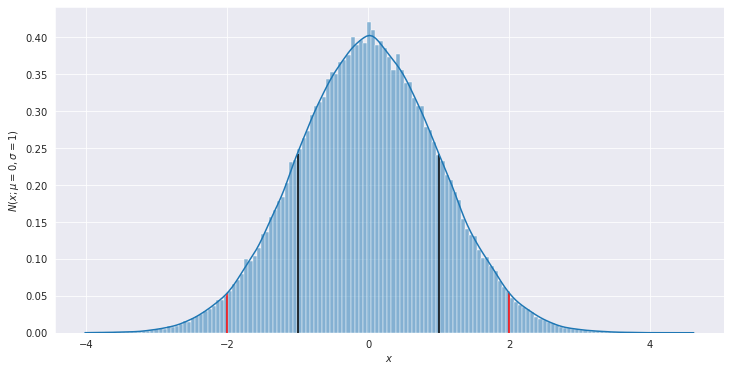

In [9]:
x = np.random.normal(0,1,size=100_000)                       # generate many random samples

fig,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.histplot(x=x,stat='density',kde=True);              # using density to normalize bin counts
ax.set_xlabel('$x$');ax.set_ylabel('$N(x;\mu=0,\sigma=1)$'); # using latex in labels
ax.vlines([-1,1],0,sp.stats.norm.pdf(1), colors='k');        # 1 standard deviation
ax.vlines([-2,2],0,sp.stats.norm.pdf(2), colors='r');        # 2 standard deviations

# Confidence Intervals
<br>

Typically we only have one sample from the population (set of experimental results, set of survey results, etc.)

In [10]:
# treat all observations as our sample
n = len(df.trip_distance)
n

1000

In [11]:
x_bar = df.trip_distance.mean()
print(f'sample mean: {x_bar:0.3f}')

sample mean: 2.880


- What is the spread of our sample statistic?
- What other values would it be reasonable to observe?

# Plotting Confidence Intervals with Seaborn

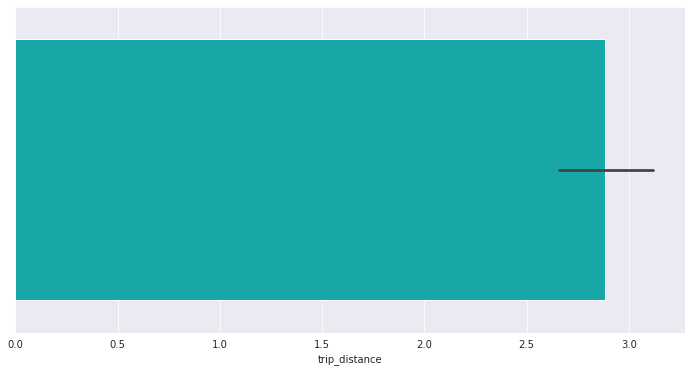

In [12]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x=df.trip_distance,
            estimator=np.mean, # default
            ci=95,              # 95% CI
            color='c',
           );

- How are these confidence intervals generated?
- What does a 95% confidence interval mean?

# Generate Confidence Intervals
<br>

**Bootstrapping:** sampling with replacement

**Bootstrap Confidence Interval:** create confidence interval using bootstrap samples

1. draw a random sample of size $n$ from the data
1. record the sample statistic from this random sample
1. repeat 1 and 2 many times
1. for an $x$% CI, trim off $\frac{1}{2}\left(1−\frac{x}{100}\right)$ of the data from both ends
1. those trim points are the endpoints of the the $x$% bootstrap CI

# 1. & 2. Draw a Random Sample and Record Statistic
<br>


In [13]:
# 1. draw a random sample with replacement
random_sample = df.trip_distance.sample(n=len(df.trip_distance), # same size as number of observations
                                        replace=True,            # sample with replacement
                                        random_state=123         # for reproducability
                                       )

In [14]:
# 2. record sample statistic
sample_means = []
sample_means.append(random_sample.mean())

# 3. Repeat Many Times

In [15]:
# tqdm gives us a progress bar when looping
from tqdm.notebook import tqdm 

In [16]:
# 3. repeat 1 and 2 many times
num_iterations = 1000
sample_means = []

for i in tqdm(range(num_iterations)):
    # 1. draw a random sample of size *n* from the data
    random_sample = df.trip_distance.sample(n=df.trip_distance.shape[0], # or frac=1
                                            replace=True,
                                            random_state=i  # for reproducability
                                           )
    # 2. record the sample statistic from this random sample
    sample_means.append(random_sample.mean())
    
# convert into a numpy array
sample_means = np.array(sample_means)

  0%|          | 0/1000 [00:00<?, ?it/s]

# Distribution of Sample Means?

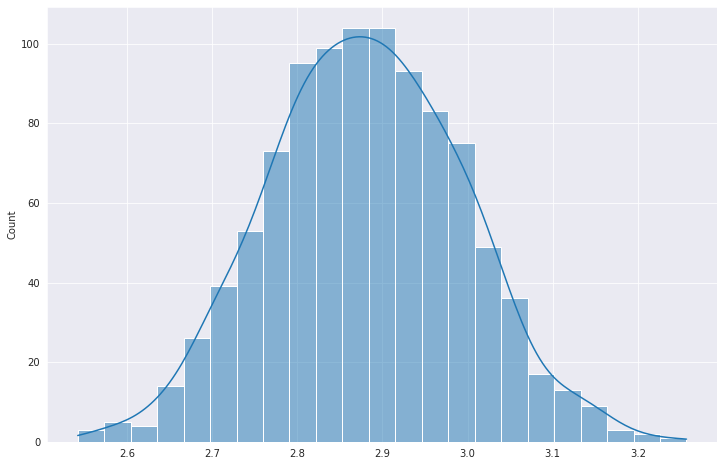

In [17]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.histplot(x=sample_means,kde=True);

- Between what two values do 95% of these samples fall?

# 4 & 5 Find CI Endpoints
<br>




In [18]:
# 4. For a 95% conf. int., trim off .5*(1-(95/100)) of the data from both ends

# calculate where to trim
trim = .5*(1-.95) * num_iterations

# find the closest integer
trim = int(np.round(trim))
trim

25

In [19]:
# for 1000 iterations and a 95% CI, we want to find the 25th value and (1000-25)th value

# 5. those trim points are the endpoints of the the x% Bootstrap CI

ci = np.sort(sample_means)[[trim,-trim-1]] # sort the array first!
ci

array([2.66425, 3.11295])

# Plotting Distribution of Sample Means With CIs

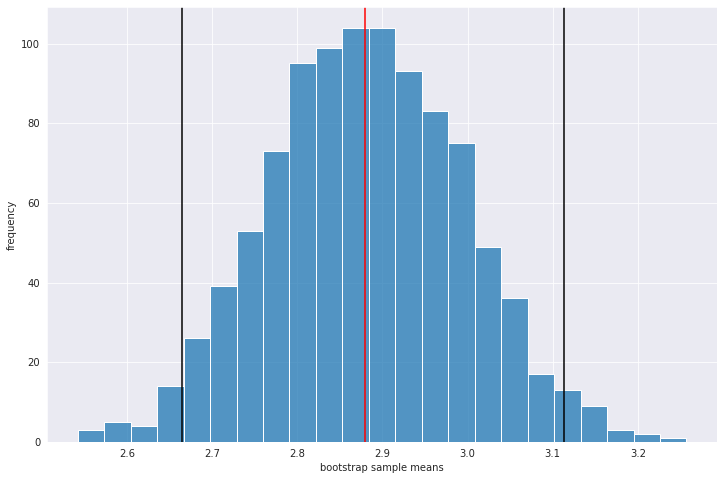

In [20]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(sample_means)
ax.axvline(df.trip_distance.mean(), color='r');
ax.axvline(ci[0],color='k')
ax.axvline(ci[1],color='k')
ax.set_xlabel('bootstrap sample means');
ax.set_ylabel('frequency');

# Interpreting CIs
<br>

- **Tells us:** something about the variablity of this statistic


- **Tells us:** how confident we should be that our parameter lies in the interval


- **Does NOT tell us:** "the probability that the true value lies within that interval"


> If confidence intervals are constructed using a given confidence level from an infinite number of independent sample statistics, the proportion of those intervals that contain the true value of the parameter will be equal to the confidence level.

<br>
<br>

# <center>Questions re CIs?</center>
<br>
<br>


# A/B Tests
<br>


- Do one of two treatments produce superior results?
 - testing two prices to determine which generates more profit
 - testing two web headlines to determine which produces more clicks
 - testing two advertisements to see which produces more conversions

- Often Used Test Statistics
 - difference in means
 - difference in counts

# Hypothesis Testing
<br>

- Ex: Does one webpage lead to more sales than another?


- **Null Hypothesis:** $H_0$
 - the thing we're observing is happening due to random chance
 - there are no differences between two groups
 - Ex: A difference in sales is just random


- **Alternative Hypothesis:** $H_1$
 - the thing we're observing is happening not due to random chance
 - there is a difference between two groups
 - Ex: A difference in sales is not random


- Experiment: given data, do we **accept or reject** $H_0$?
 - Ex: if we collect sales can we say that a difference between the two pages isn't random?

# Errors in Hypothesis Tests
<br>
<br>

<div align="center"><img src="https://www.gilliganondata.com/wp-content/uploads/2009/08/TypeI_TypeII1.JPG" width="800px"></div>

https://www.gilliganondata.com/wp-content/uploads/2009/08/TypeI_TypeII1.JPG

# Errors in Hypothesis Tests
<br>
<br>

<div align="center"><img src="https://flowingdata.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-620x465.jpg" width="700px"></div>

https://flowingdata.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-620x465.jpg

# Significance and Power
<br>
<br>

- $P\left(\text{reject } H_0 \mid H_0 \text{ true}\right)$ = **Significance** of test or **p-value** (Type I Error)
 - Probablity of saying **things aren't by chance when they are**
 - Ex: Saying Ad A was correlated with more sales, when the difference *is* random
<br>
<br>

- $P\left(\text{reject } H_0 \mid H_1 \text{ true}\right)$ = **Power** of test (1-Type II Error)
 - Probability of saying **things aren't by chance when they aren't**
 - Ex: Saying Ad A was correlated with more sales, when the difference *is not* random

# Ex: Webpages and Sales
<br>

- Question: Which webpage leads to more sales?

- Potential Issue: what if sales are large but infrequent?

- **Proxy Variable:** stand in for true value of interest
 - Ex: Assume 'time on page' is correlated with sales

In [21]:
session_times = pd.read_csv('../data/web_page_data.csv')
print(session_times.shape)

session_times.head(3)

(36, 2)


,Page,Time
0,Page A,12.6
1,Page B,151.8
2,Page A,21.0


# Ex: Webpages and Sales

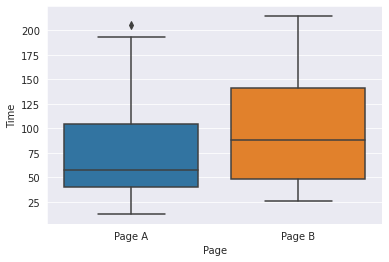

In [22]:
sns.boxplot(x='Page',y='Time',data=session_times);

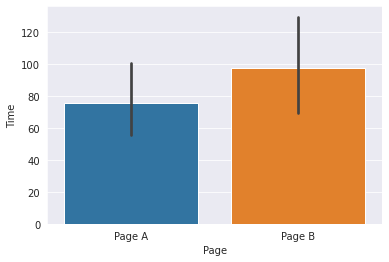

In [23]:
sns.barplot(x='Page',y='Time',data=session_times,estimator=np.mean,ci=95);

# Ex: Webpages and Sales, Define the Metric
<br>


- **Metric:** the measure we're interested in
 - Ex: We're interested in a difference of means (Page A - Page B)

In [24]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
observed_metric = mean_a-mean_b
print('observed metric: {:0.2f}'.format(observed_metric))

observed metric: -21.40


- Is this surprising? Should we reject the null?
 - Assuming that $H_0$ is true, is this observation surprising?

# Permutation Test
<br>

Recall the Central Limit Theorem:
> For reasonably large samples, the distribution of sample mean $\bar{x}$ is normal regardless of the distribution of $X$.

- How do we generate additional samples of the difference in means? Resampling!
- Need to repeatedly split the data into two groups and take the differince in means
- One way to do this: combine, permute (reorder) and split

# Permutation Test
<br>

1. combine groups together (assume $H_0$ is true)
  
2. permute (reorder) observations

3. create new groups (same sizes as original groups)

4. calculate metric

5. repeat many times

6. see where our original observation falls in the distribution of sample statistics

# Websites and Sales, Permutation Test

In [25]:
# 0. get group sizes
n_a = sum(session_times.Page == 'Page A')
n_b = sum(session_times.Page == 'Page B')
n = n_a + n_b
print(f'{n_a=} {n_b=} {n=}')

n_a=21 n_b=15 n=36


In [26]:
# 1. combine groups together (assume H0 is true)
session_times.Time[:2]

0     12.6
1    151.8
Name: Time, dtype: float64

In [27]:
# 2. permute observations
permuted = session_times.Time.sample(frac=1,replace=False,random_state=123)
permuted[:2]

6    126.6
8     79.2
Name: Time, dtype: float64

In [28]:
# 3. create new groups
rand_mean_a = permuted[:n_a].mean()
rand_mean_b = permuted[n_a:].mean()

# 4. calculate metric
rand_mean_diff = (rand_mean_a - rand_mean_b)
print('{:.2f}'.format(rand_mean_diff))

17.41


# Websites and Sales, Permutation Test Continued

In [29]:
# 5. repeat many times
rand_mean_diffs = []
iterations = 10_000

for i in tqdm(range(iterations)):
    permuted = session_times.Time.sample(frac=1,replace=False,random_state=i)
    
    rand_mean_a = permuted[:n_a].mean()
    rand_mean_b = permuted[n_a:].mean()
    
    rand_mean_diffs.append(rand_mean_a - rand_mean_b)
    
rand_mean_diffs[:5]

  0%|          | 0/10000 [00:00<?, ?it/s]

[-16.257142857142853,
 -16.874285714285705,
 -10.291428571428597,
 31.811428571428564,
 -10.565714285714321]

# Websites and Sales, Permutation Test Continued

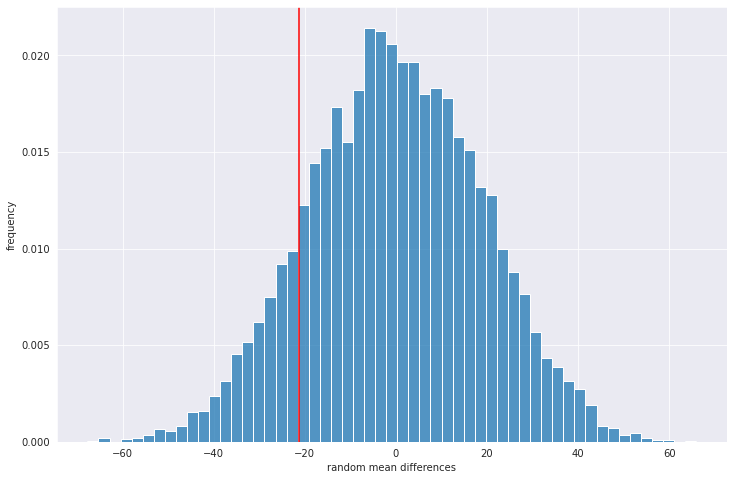

In [30]:
# 6. see where our original observation falls
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(x=rand_mean_diffs, stat='density')
ax.set_xlabel('random mean differences');ax.set_ylabel('frequency');
ax.axvline(observed_metric, color='r');

- Would be easier to interpret if this was a Standard Normal distribution...

# Normalization: z-score

Convert our distribution to an approximation of standard normal

1. shift mean to 0
2. set standard deviation of 1

<center>$\Large z = \frac{x - \bar{x}}{s}$</center>


In [31]:
xbar = np.mean(rand_mean_diffs)
s = np.std(rand_mean_diffs)

rand_zscores = (rand_mean_diffs - xbar) / s
 

In [32]:
observed_metric_zscore =  (observed_metric - xbar) / s

# Websites and Sales, Permutation Test Continued

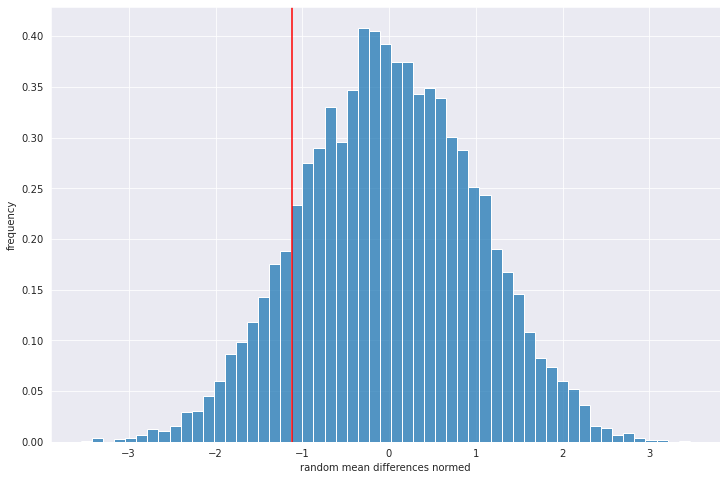

In [33]:
# 6. see where our original observation falls (normalized)
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(rand_zscores, stat='density')
ax.set_xlabel('random mean differences normed');ax.set_ylabel('frequency');
ax.axvline(observed_metric_zscore,color='r');

# Why Use Permutation Tests?
<br>

- data can be numeric or boolean (ex. temperature, conversion, etc)

- sample sizes can be different

- assumptions about normally distributed data are not needed (with many permutations)

# How sure are we?
<br>

- **p-value**

> The probability of finding the observed result, or one more extreme, when the null hypothesis ($H_0$) is true.

- **does mean** : $P\left(\text{data} \mid H_0 \text{ is true}\right)$



- **does NOT mean** : $P\left(H_0 \text{ is not true} \mid \text{data}\right)$



- Our question about significance becomes:

> "How often did we see a value as or more extreme than our observed metric?"

# Calculating p

In [34]:
# find absolute values greater than our observed_metric
gt = np.abs(np.array(rand_mean_diffs)) >= np.abs(observed_metric)

In [35]:
# how many are greater?
num_gt = gt.sum()

# proportion of total that are as or more extreme
p = num_gt / len(rand_mean_diffs)
print(f'{p = :0.3f}')

p = 0.265


# One-Tailed vs Two-Tailed Tests
<br>
<br>

<div align="center"><img src="http://www.fao.org/3/X6831E/X6831E120.gif", width="800px"></div>
    
https://towardsdatascience.com/one-tailed-or-two-tailed-test-that-is-the-question-1283387f631c?gi=9568e456cd13

# Choosing One-Tailed vs Two-Tailed
<br>

- Do we have a strong reason for a one-tailed? One-Tailed
 - Ex: $H_0$ is "difference is less than or equal to 0"
 - Need a strong reason


- Otherwise? Two-tailed
 - Ex: $H_0$ is "there is no real difference between groups"
 - More conservative
 - Usually a better choice

# One-Tailed Test Example

In [36]:
# one-tailed test
sum(np.array(rand_mean_diffs) <= observed_metric) / len(rand_mean_diffs)

0.1326

Note that this is less than our Two-Tailed value!

In [37]:
# two-tailed test
sum(np.abs(np.array(rand_mean_diffs)) >= np.abs(observed_metric)) / len(rand_mean_diffs)


0.2653

# Choosing $\alpha$
<br>

- **alpha** ($\alpha$): significance level
 - What we compare our p-value to
 - Best to choose this before calculating metrics
 - Probability of rejecting the null when it is true (Type I Error)

- Common values:
 - .1 (Error 1 out of 10 times)
 - .05 (Error 1 out of 20 times)
 - .01 (Error 1 out of 100 times)


- Should depend on how bad a Type I (False Positive) Error is

# Another Example: Price vs Conversion
<br>


- Does Price A lead to higher conversions than Price B?
- **Conversion:** Turning a visit into a sale

- $H_0$: conversions for Price A ≤ conversions for Price B 
 - Price A does not lead to more conversions
 
- $H_1$: conversions for Price A > conversions for Price B 
 - Price A leads to more conversions

In [38]:
# Counts of observations
df = pd.DataFrame({'Price A':[200,23539],
                   'Price B':[182,22406]},
                   index=['Conversion','No Conversion'])
df

,Price A,Price B
Conversion,200,182
No Conversion,23539,22406


# Another Example: Price vs Conversion Continued

- Metric of Interest?
 - difference in percent conversion
 

In [39]:
pct_conv = df.loc['Conversion'] / df.sum(axis=0) * 100
with pd.option_context('precision',2):
    print(pct_conv)

Price A    0.84
Price B    0.81
dtype: float64


In [40]:
diff_pct_conv = pct_conv['Price A'] - pct_conv['Price B']
print(f'{diff_pct_conv:.3f}%')

0.037%


# Another Example: Price vs Conversion Continued
<br>


- First: Choose our $\alpha$: 0.05

- Reminder of Permutation Test:
 0. get group sizes
 1. combine groups together
 2. permute observations
 3. create two new groups (same sizes as originals)
 4. calculate metric
 5. repeat many times
 6. see where our original observation falls

# Another Example: Price vs Conversion Continued
<br>


- What are our samples?
 - 1 = Conversion
 - 0 = No conversion
 
- How many samples are there?

In [41]:
n = df.sum().sum()
n

46327

# Another Example: Price vs Conversion Continued
<br>


- Turning counts into samples

In [42]:
n_conversion = df.loc['Conversion'].sum()
n_conversion


382

In [43]:
samples = np.zeros(n)
samples[:n_conversion] = 1

assert sum(samples) == n_conversion

# Another Example: Price vs Conversion Continued
<br>



In [44]:
n_a, n_b = df.sum(axis=0)
print(f'{n_a=} {n_b=} {n=}')

assert n_a + n_b == n

n_a=23739 n_b=22588 n=46327


In [45]:
np.random.seed(123)
rand_conv_diffs = []
for i in tqdm(range(1000)):
    permutation = np.random.permutation(samples)
    rand_conv_a = sum(permutation[:n_a]) / n_a
    rand_conv_b = sum(permutation[n_a:]) / n_b
    rand_conv_diffs.append(100 * (rand_conv_a - rand_conv_b))

  0%|          | 0/1000 [00:00<?, ?it/s]

# Another Example: Price vs Conversion Continued
<br>


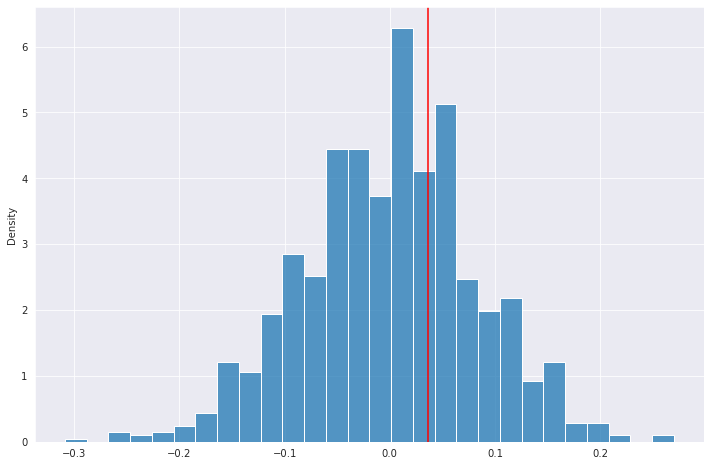

In [46]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(x=rand_conv_diffs, stat='density')
ax.axvline(diff_pct_conv,color='r');

In [47]:
# calculate a two-tailed p-value
sum(np.array(rand_conv_diffs) >= diff_pct_conv) / len(rand_conv_diffs)

0.35

# Equation Based Proportion Test
<br>


In [48]:
from statsmodels.stats.proportion import proportions_ztest

z,p = proportions_ztest(df.loc['Conversion'].values,
                        df.sum(),
                        alternative='two-sided')
print(f'{p = :0.3f}')

p = 0.662


# Equation Based Hypothesis Test: t-Test 
<br>

- based on the Student-t distribution
- more involved to describe
- works for numeric data (can't use it for the last example)

In [49]:
# using our session_times example
t = sp.stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time.values,
                       session_times[session_times.Page == 'Page B'].Time.values,
                       equal_var=False)
print(f'{t.pvalue = :0.3f}')

t.pvalue = 0.282


- very close to the 0.27 value we found via permutation test

# Issues with Multiple Testing
<br>

- p-hacking: keep trying comparisons till you find something that works


- multiple tests: the more tests you run, the more likely a Type 1 Error
 - Bonferonni correction: $\frac{\alpha}{m}$ where $m$ is the number of tests

# Statistically Significant?
<br>

[**The ASA Statement on p-Values: Context, Process, and Purpose**](https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108) Wasserstein &amp; Lazar, 09 Jun 2016]


- Don’t base your conclusions solely on whether an association or effect was found to be “statistically significant” (i.e., the p-value passed some arbitrary threshold such as p &lt; 0.05).


- Don’t believe an association/effect **exists** just because it **was statistically significant**.


- Don’t believe an association/effect **is absent** just because it **was not stat. significant**.


- Don’t believe that your p-value:
    1. gives the **probability that chance alone** produced the observed association/effect or
    2. the probability that your **test hypothesis is true**.]


- Don’t conclude anything about **scientific or practical importance** based on statistical significance (or lack thereof).


# Statistically Significant?
<br>


[**Moving to a World Beyond “p &lt; 0.05”**](https://www.tandfonline.com/doi/full/10.1080/00031305.2019.1583913) Wasserstein, Schirm &amp; Lazar, 20 Mar 2019


- Try to avoid “Statistically Significant”

- “**A**ccept uncertainty. Be **t**houghtful, **o**pen, and **m**odest.” Remember “**ATOM**.”

- ATOM
 - **A:** Seek better measures, more sensitive designs, larger samples
<br>
<br>
 - **T:** Begin with clearly expressed objectives
 - **T:** Ask "What are the practical implications?"
<br>
<br>
 - **O:**: Be open/transparent in analysis and communication
<br>
<br>
 - **M:** Accept limititaions, assumptions, reproduction, recognizing differences in stakes

# Comparing More Than 2 Groups

- ANOVA
 - need more stats than we have time for
        
- Multi-Armed Bandit (MAB)
 - can compare many distributions
 - don't need to make assumptions about underlying distributions
 - can also be used for early stopping of experiment

# Multi-Armed Bandit
<br>

<div align="center"><img src="https://cdn.psychologytoday.com/sites/default/files/field_blog_entry_images/2019-07/casino-3491252_1920.jpg" width="600px"></div>


**Question:** Which arm should we pull?

# Greedy MAB

**greedy:** do something simple that heads towards the goal


1. pull arm with highest payout


But what if there's a better choice, we just haven't seen it yet?

# Exploration Vs Exploitation
<br>

- **Exploration:** There might be a better arm
 - keep choosing different arms randomly
<br>
<br>

- **Exploitation:** We want to make use of the best
 - keep pulling the best arm

# $\epsilon$-Greedy MAB

- choose a small epsilon ($\epsilon$) between 0 and 1
<br>

1. generate random number between 0 and 1
2. if < ϵ, choose arm randomly
3. if ≥ ϵ, choose best arm
4. GOTO 1

# MAB Example
<br>

- We have two ads
- We don't know how often each will lead to a response
- We need to decide which ad to add to each page request

In [50]:
# creating two ads (distributions) with unknown response rate
np.random.seed(13)
ad_A = sp.stats.bernoulli(p=np.random.rand())
ad_B = sp.stats.bernoulli(p=np.random.rand())

- We'll use an $\epsilon$-greedy MAB to decide which ad to show

In [51]:
# epsilon probability
epsilon = 0.40

# MAB Example Continued
<br>

- Rounds 1 and 2
 - Pull each arm once

In [52]:
pulls_A = [ad_A.rvs()]

pulls_B = [ad_B.rvs()]

pulls_A,pulls_B

([0], [1])

# MAB Example Continued
<br>

- Round 3
 - With probability $1-\epsilon$, choose the best arm (B)

In [53]:
be_greedy = np.random.rand() > epsilon
be_greedy

True

In [54]:
pulls_B.append(ad_B.rvs())

pulls_A,pulls_B

([0], [1, 0])

# MAB Example Continued
<br>

In [55]:
def mab(ad_A,ad_B,pulls_A,pulls_B,epsilon):
    be_greedy = np.random.rand() > epsilon
    if not be_greedy: # randomly choose
        if np.random.rand() < 0.5:
            pulls_A.append(ad_A.rvs())
            choice = 'A'
        else:
            pulls_B.append(ad_B.rvs())
            choice = 'B'
    else: # be greedy
        resp_A = sum(pulls_A) / len(pulls_A)
        resp_B = sum(pulls_B) / len(pulls_B)
        if resp_A > resp_B:
            pulls_A.append(ad_A.rvs())
            choice = 'A'
        else:
            pulls_B.append(ad_B.rvs())
            choice = 'B'
    return pulls_A, pulls_B, be_greedy, choice

# MAB Example Continued
<br>

- Round 4

In [56]:
pulls_A, pulls_B, be_greedy, choice = mab(ad_A,
                                          ad_B,
                                          pulls_A,
                                          pulls_B,
                                          epsilon)
print(f'{str(be_greedy):5s} {choice} => '+
          f'{np.mean(pulls_A):0.2f}:{np.mean(pulls_B):0.2f} {str(pulls_A):20s}, {str(pulls_B):20s}')

True  B => 0.00:0.67 [0]                 , [1, 0, 1]           


# MAB Example Continued
<br>

In [57]:
for i in range(10):
    pulls_A, pulls_B, be_greedy, choice = mab(ad_A,ad_B,pulls_A,pulls_B,epsilon)
    print(f'{str(be_greedy):5s} {choice} => '+
          f'{np.mean(pulls_A):0.2f}:{np.mean(pulls_B):0.2f} {str(pulls_A):20s}, {str(pulls_B):20s}')

True  B => 0.00:0.50 [0]                 , [1, 0, 1, 0]        
False A => 0.50:0.50 [0, 1]              , [1, 0, 1, 0]        
True  B => 0.50:0.40 [0, 1]              , [1, 0, 1, 0, 0]     
True  A => 0.67:0.40 [0, 1, 1]           , [1, 0, 1, 0, 0]     
False A => 0.75:0.40 [0, 1, 1, 1]        , [1, 0, 1, 0, 0]     
True  A => 0.80:0.40 [0, 1, 1, 1, 1]     , [1, 0, 1, 0, 0]     
False B => 0.80:0.33 [0, 1, 1, 1, 1]     , [1, 0, 1, 0, 0, 0]  
False B => 0.80:0.43 [0, 1, 1, 1, 1]     , [1, 0, 1, 0, 0, 0, 1]
False B => 0.80:0.50 [0, 1, 1, 1, 1]     , [1, 0, 1, 0, 0, 0, 1, 1]
False B => 0.80:0.44 [0, 1, 1, 1, 1]     , [1, 0, 1, 0, 0, 0, 1, 1, 0]


# MAB Example Continued
<br>

- Which arm seems best?

In [58]:
print(f'conversion rates: A: {np.mean(pulls_A):0.2f} B: {np.mean(pulls_B):0.2f}')

conversion rates: A: 0.80 B: 0.44


- Did we pick the best one?

In [59]:
print(f'ground truth: A: {ad_A.pmf(1):0.2f} B: {ad_B.pmf(1):0.2f}')

ground truth: A: 0.78 B: 0.24


# MAB Variations
<br>


- Thompson's Sampling: uses Baysian approach

- UCB1: maximize expected reward using Upper Confidence Bounds

- UCBC: Upper Confidence Bound with Clusters

- ...


<br>
<br>

# <center>Questions?</center>
<br>
<br>